In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.dates import DateFormatter

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
plt.rcParams['figure.figsize'] = (10, 4)

import datetime
import os

import locale 
locale.setlocale(locale.LC_TIME, "es_ES");


from globales import *

# Inicio 

In [2]:
analisisDir   = GlobalSU['AnaPath'] + '/SSTGlobalAnalysis/'
imagesDir     = GlobalSU['AnaPath'] + '/SSTGlobalAnalysis/images'

In [3]:
Titulos = ['Oceano Global','Hemisferio norte','Hemisferio sur','AtlanticoNorte', 'Demarcación marina levantino-balear', 'Demarcación marina noratlántica','Demarcación marina canaria','Demarcación sudatlántica','Demarcación Estrecho y Alborán','Iberian Canary Basin']
Titulos_short = ['GO','NH','SH','NAtl','LEB', 'NOR','CAN','SUD','ESA','IBICan']

In [8]:
it=0

In [9]:
titulo = Titulos[it]
titulo_short = Titulos_short[it]
print(titulo)

Oceano Global


In [10]:
Title  = 'Anomalía de temperatura superficial en el '+ titulo
FileIn =  analisisDir+'/data/sstLD_anom_'+titulo_short+'.nc'
FileOut = analisisDir+'/images/map_sstd_anom_'+titulo_short+'.png'

In [11]:
data = xr.open_dataset(FileIn)
sst = data.sst

In [15]:
sst.time

<xarray.DataArray 'time' ()> Size: 8B
array('2025-05-12T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time       datetime64[ns] 8B 2025-05-12
    dayofyear  int64 8B ...

# Figura

In [12]:
escalaLand='50m'
if titulo_short == 'NH':
     escalaLand='110m'
elif titulo_short == 'SH':
     escalaLand='110m'
elif titulo_short == 'GO':
     escalaLand='110m'

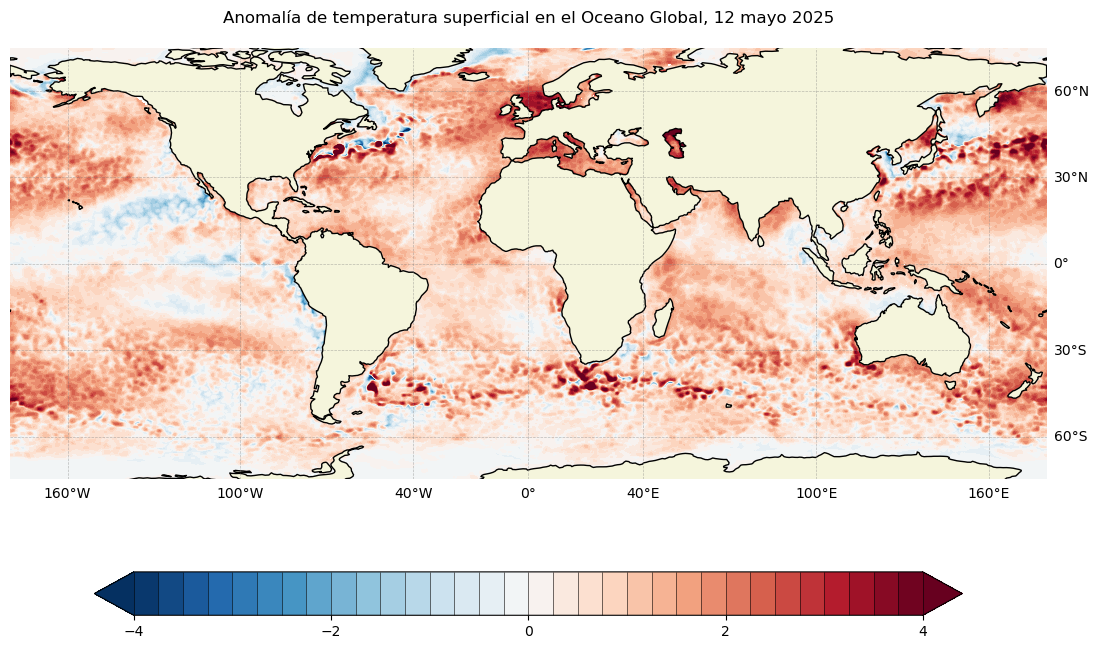

In [13]:
fig = plt.figure(figsize=(14,8))

ax = plt.axes(projection=ccrs.PlateCarree(),frameon=False)

land = cartopy.feature.NaturalEarthFeature('physical', 
                'land', edgecolor='k', scale = escalaLand ,
                facecolor=cfeature.COLORS['land'])

ax.add_feature(land, facecolor='beige')
    
cm=ax.contourf(sst.lon,sst.lat,sst, levels=np.arange(-4,4.1,0.25),
               transform = ccrs.PlateCarree(),
               cmap = plt.cm.RdBu.reversed(),
               vmin = -4,vmax = 4,extend='both')

cbar=fig.colorbar(cm,ax=ax, location='bottom',
    shrink=.8, ticks=[-4,-2,0,2,4], drawedges=True)

gd=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=.5, color='gray', alpha=0.5, linestyle='--',x_inline=False, y_inline=False)
gd.ylocator = mticker.FixedLocator([-60,-30,0,30,60])
gd.xlocator = mticker.FixedLocator([-160, -100, -40,0,40,100,160])
gd.left_labels = False
gd.top_labels = False

ax.set_title(Title + ', ' + sst.time.dt.strftime("%d %B %Y").values + '\n');#
#plt.savefig(FileOut)